# Nelder Mead Grace Version

21
0
[(9.255655175541278, 1.5514550862053067), (-5.448591383961605, 7.231614432341868), (-8.678144430362757, 2.167533116341451)]
0
[(9.255655175541278, 1.5514550862053067), (-5.448591383961605, 7.231614432341868), (-8.678144430362757, 2.167533116341451)]
1
[(-8.678144430362757, 2.167533116341451), (-7.063367907162181, 4.699573774341659), (0.2887553725892609, 1.8594941012733788)]
2
[(0.2887553725892609, 1.8594941012733788), (-3.3873062672864602, 3.279533937807519), (-4.194694528886748, 2.013513608807415)]
3
[(0.2887553725892609, 1.8594941012733788), (-1.9529695781487435, 1.9365038550403968), (-1.5492754473485997, 2.569514019540449)]
4
[(0.2887553725892609, 1.8594941012733788), (-0.8321071027797413, 1.8979989781568878), (-0.6302600373796694, 2.214504060406914)]
5
[(0.2887553725892609, 1.8594941012733788), (-0.2716758650952402, 1.8787465397151333), (-0.17075233239520426, 2.0369990808401464)]
6
[(0.2887553725892609, 1.8594941012733788), (-0.2716758650952402, 1.8787465397151333), (0.1878318

0
[(9.255655175541278, 1.5514550862053067), (-5.448591383961605, 7.231614432341868), (-8.678144430362757, 2.167533116341451)]


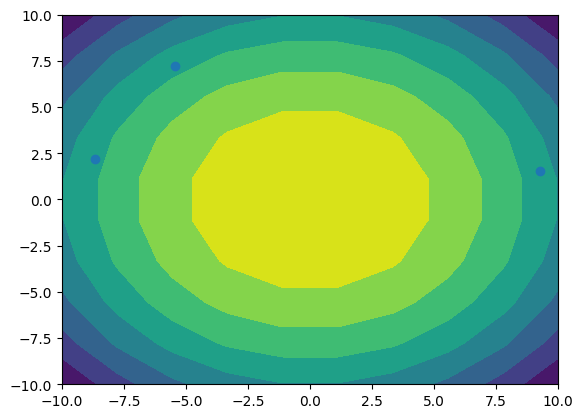

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML # disply inline for code 

def centroid(best, second):
    x = (best[0]+second[0])/2
    y = (best[0]+second[0])/2
    return (x,y)

# originally was reflection function, but can be used to move all points
def move_point(point_away, point_towards, factor):
    in_water = True

    while in_water:
        x = point_towards[0]+(point_towards[0]-point_away[0])*factor
        y = point_towards[1]+(point_towards[1]-point_away[1])*factor

        if True: #TODO: check if in specified polygon? (duncan function?)
            break
        else:
            factor = factor/2

    return (x,y)

def ranking(points, func):

    val = []
    for point in points:
        val.append(func(point))

    ind = [0,1,2]
    best_ind = np.argmax(val)
    worst_ind = np.argmin(val)
    ind.remove(best_ind)
    ind.remove(worst_ind)
    second_ind = ind[0]
    best = points[best_ind]
    worst = points[worst_ind]
    second = points[second_ind]
    
    return best, worst, second, val[best_ind], val[worst_ind], val[second_ind]


def nelder_mead(points, func, limit):
    
    plot_points = []
    plot_points.append(points)

    for i in range(limit):
        best, worst, second, best_val, worst_val, second_val = ranking(points, func)

        # first perform reflection
        bs_centroid = centroid(best, second)
        temp = move_point(worst,bs_centroid,1)
        temp_val = func(temp)

        # if temp better than best value, perform expansion
        if temp_val > best_val:
            temp_exp = move_point(bs_centroid,temp,1) 
            temp_exp_val = func(temp)
            if temp_exp_val > temp_val:
                worst = temp_exp
            else:
                worst = temp

        # if temp better than only second value, just keep value
        elif temp_val > second_val:
            worst = temp

        # if temp better than only worst, contract
        elif temp_val > worst_val:
            temp_cont = move_point(worst,bs_centroid,-0.5) 
            temp_cont_val = func(temp)
            if temp_cont_val > temp_val:
                worst = temp_cont
            else:
                worst = temp

        # not better than anything, shrink
        else: 
            worst = move_point(worst, best, -0.5)
            second = move_point(second, best, -0.5)

        points = [best, second, worst]
        plot_points.append(points)
    
    return plot_points

def paraboloid(coords, a=1, b=1):
    x, y = coords
    return -a * x**2 - b * y**2

def rosenbrock(coords, a=1, b=100):
    x, y = coords
    return -(a - x)**2 - b * (y - x**2)**2

def objective(x, y):
	return 0.26 * (x**2 + y**2) - 0.48 * x * y

# https://machinelearningmastery.com/2d-test-functions-for-function-optimization/
def objective_spike(coords):
    x, y = coords
    return np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

points = []
lims = (-10,10)
for i in range(3):
    x = np.random.uniform(lims[0],lims[1])
    y = np.random.uniform(lims[0],lims[1])
    points.append((x,y))


plot_points = nelder_mead(points, paraboloid,20)

# Generating data
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)
# Z = -(1 - X)**2 - 100 * (Y - X**2)**2 # rosenbrock
# Z = np.cos(X) * np.cos(Y) * np.exp(-((X - np.pi)**2 + (Y - np.pi)**2))
Z = -1 * X**2 - 1 * Y**2



def animate(i):
    try:
        plt.cla()
        points = plot_points[i]
        print(i)
        print(points)
        plt.contourf(X, Y, Z)
        plt.scatter(*zip(*points))
    except:
        print("cry")


print(len(plot_points))

fig = plt.figure()
ani = FuncAnimation(fig, animate, frames = range(len(plot_points)),repeat = False)

# Display the animation inline
HTML(ani.to_html5_video())
# plt.ylim(-1000,1000)
# plt.xlim(-1000,1000)
# plt.show()
# ani.save(filename="example.gif", writer="ffmpeg")

# Nelder Mead Scipy Example



In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function (Rosenbrock function)
def rosenbrock(coords, a=1, b=100):
    x, y = coords
    return (a - x)**2 + b * (y - x**2)**2

# Initial guess for the coordinates (x, y)
initial_guess = np.array([0, 0])

# Perform the optimization using Nelder-Mead
result = minimize(rosenbrock, initial_guess, method='Nelder-Mead')

# Print the results
print("Optimal coordinates:", result.x)
print("Function value at optimal point:", result.fun)
print("Number of iterations:", result.nit)
print("Optimization successful:", result.success)


Optimal coordinates: [1.00000439 1.00001064]
Function value at optimal point: 3.6861769151759075e-10
Number of iterations: 79
Optimization successful: True
